<a href="https://colab.research.google.com/github/shubhkamble26/Handwritten-Digit-Recognition-using-Neural-Network/blob/master/Handwritten_Digit_Recognition_using_Neural_Neatwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten digit recognition using Neural Network
To create and train a Neural Network model that predict digits from hand-written images 

This model takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit 



Install keras and tensorflow as a backend for keras 

In [49]:
!install keras
!install tensorflow

install: missing destination file operand after 'keras'
Try 'install --help' for more information.
install: missing destination file operand after 'tensorflow'
Try 'install --help' for more information.


Importing tensorflow as tf

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.2.0


# Load Dataset

Load MNIST dataset which has lots of images of hand-written digits along with their labels.

In [51]:
from tensorflow.keras.datasets import mnist
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

To find shape of each of the Training set and Test Set

In [52]:
print('train_X shape:{},train_Y shape:{} '.format(train_X.shape,train_Y.shape))
print('test_X shape:{},test_Y shape:{} '.format(test_X.shape,test_Y.shape))

train_X shape:(60000, 28, 28),train_Y shape:(60000,) 
test_X shape:(10000, 28, 28),test_Y shape:(10000,) 


Displaying first example in training dataset and it's label

Actual label of first example in training dataset is : 5


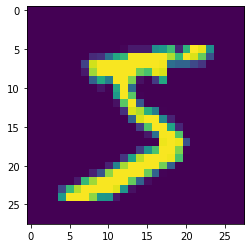

In [53]:
print('Actual label of first example in training dataset is :',train_Y[0])
plt.imshow(train_X[0])
plt.show()

Total different digits present in dataset

In [54]:
print("Total different digits present in a dataset: ",set(train_Y))

Total different digits present in a dataset:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Apply One Hot Encoding to the y_train and y_test

Convert the number to a vectorial form using One Hot Encoding

* original label :5 
* One-hot encoded label: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 


In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(train_Y)
Y[0]

5

In [56]:
from tensorflow.keras.utils import to_categorical

train_Yvector = to_categorical(train_Y)
test_Yvector = to_categorical(test_Y)

Checking the shape of the encoded label vectors.

In [57]:
print('train_Yvector shape: ', train_Yvector.shape)
print('test_Yvector shape: ', test_Yvector.shape)

train_Yvector shape:  (60000, 10)
test_Yvector shape:  (10000, 10)


Each label gets converted into 10 Dimensional vector


Let's look at the first label after encoding:

In [58]:
print(train_Yvector[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Preprocessing the Examples

Create a Neural Network which will take 784 dimensional vectors as inputs (28 rows * 28 columns) and will output a 10 dimensional vector (For the 10 classes). We have already converted the outputs to 10 dimensional, one-hot encoded vectors. Use numpy to easily unroll the examples from `(28, 28)` arrays to `(784, 1)` vectors.

* Unrolling an 28X28 image into 784 dimensional vecor. with 10 classes 0-9 
* (28,28) ----- (784,1)
* By using reshape in numpy


In [59]:
train_Xreshape = np.reshape(train_X, (60000, 784))
test_Xreshape = np.reshape(test_X, (10000, 784))

print('train_Xreshaped shape: ', train_Xreshape.shape)
print('test_Xreshaped shape: ', test_Xreshape.shape)

train_Xreshaped shape:  (60000, 784)
test_Xreshaped shape:  (10000, 784)


As this 784 dimensional vector is a pixel value for each example.Check pixels of a first example 

In [60]:
print(set(train_Xreshape[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


Pixels are varying from 0 to 255. Now normalise the data as it's range is large.Apply standard normalisation

In [61]:
mean_X = np.mean(train_Xreshape)
std_X = np.std(train_Xreshape)

print('Mean:{}, Standard Deviation:{}'.format(mean_X,std_X))

Mean:33.318421449829934, Standard Deviation:78.56748998339798


Normalise both the training and test set using the mean and standard deviation calculated above.

In [62]:
train_Xnormalised = (train_Xreshape - mean_X)/(std_X)
test_Xnormalised = (test_Xreshape - mean_X)/(std_X)

Let's check first normalised value

In [63]:
print(set(train_Xnormalised[0]))

{-0.3858901621553201, 1.3069219669849146, 1.1796428595307615, 1.8033104860561113, 1.6887592893473735, 2.821543345689335, 2.7197200597260127, 1.192370770276177, 1.53602436040239, 1.7396709323290347, 2.7960875241985046, 2.6560805059989363, 2.18514780841857, 2.4906176663085375, -0.10587612575618353, 2.681536327489767, 0.03413089244338476, -0.19497150097409063, 0.7723497156774721, 0.9378125553678709, -0.2458831439557518, 2.210603629909401, 1.9051337720194337, 1.2687382347486686, 1.7651267538198654, -0.424073894391566, 0.41596821480584373, -0.2840668761919977, 0.27596119660627544, 1.4596568959298981, 1.2941940562394993, 2.096052433200663, 1.9560454150010949, 2.7579037919622587, 1.4851127174207288, -0.09314821501076823, 2.783359613453089, 2.286971094381893, 2.4524339340722916, 1.3451056992211605, -0.042236572029107036, 2.643352595253521, -0.13133194724701414, 0.7596218049320568, 0.28868910735169073, 0.6068868759870732, 0.6196147867324885, -0.4113459836461507, 0.46687985778750496, 0.950540466

# Create Model

Use a Sequential class defined in Keras to create our model. All the layers are going to be Dense layers. This means, like our examples above, all the nodes of a layer would be connected to all the nodes of the preceding layer i.e. densely connected.

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(100, activation = 'sigmoid', input_shape = (784,)),
    Dense(100, activation = 'sigmoid'),
    Dense(10, activation = 'softmax')
])

Above model have two hidden layers with 128 nodes each and one output layer with 10 nodes. We set the input shape on the first hidden layer to correspond to the shape of a single example from our reshaped training and test sets  each example is a 784 dimensional vector for the 784 pixels of the images.



Use stochastic gradient descent algorithm in order to optimize the weights and biases as per the given data.

This loss needs to be minimised in order to have a higher model accuracy. Optimasation algorithm minimises the loss during model training.Use *categorical cross entropy* as optimisation function.


In [65]:
model.compile(
    optimizer = 'Adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


# Training the Model

Train the model for 3 epochs.

In [66]:
h = model.fit(
    train_Xnormalised,
    train_Yvector,
    epochs = 3
)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3681 - accuracy: 0.9057
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1408 - accuracy: 0.9587
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0969 - accuracy: 0.9718


Evaluate the performance on the test set. Simply use the `evaluate` method on our model.

In [67]:
loss, accuracy = model.evaluate(test_Xnormalised, test_Yvector)

print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.1021 - accuracy: 0.9696
test set accuracy:  96.96000218391418


# Predictions

In [68]:
predictions = model.predict(test_Xnormalised)

print('shape of predictions: ', predictions.shape)

shape of predictions:  (10000, 10)


Plotting the first few test set images along with their predicted and actual labels.

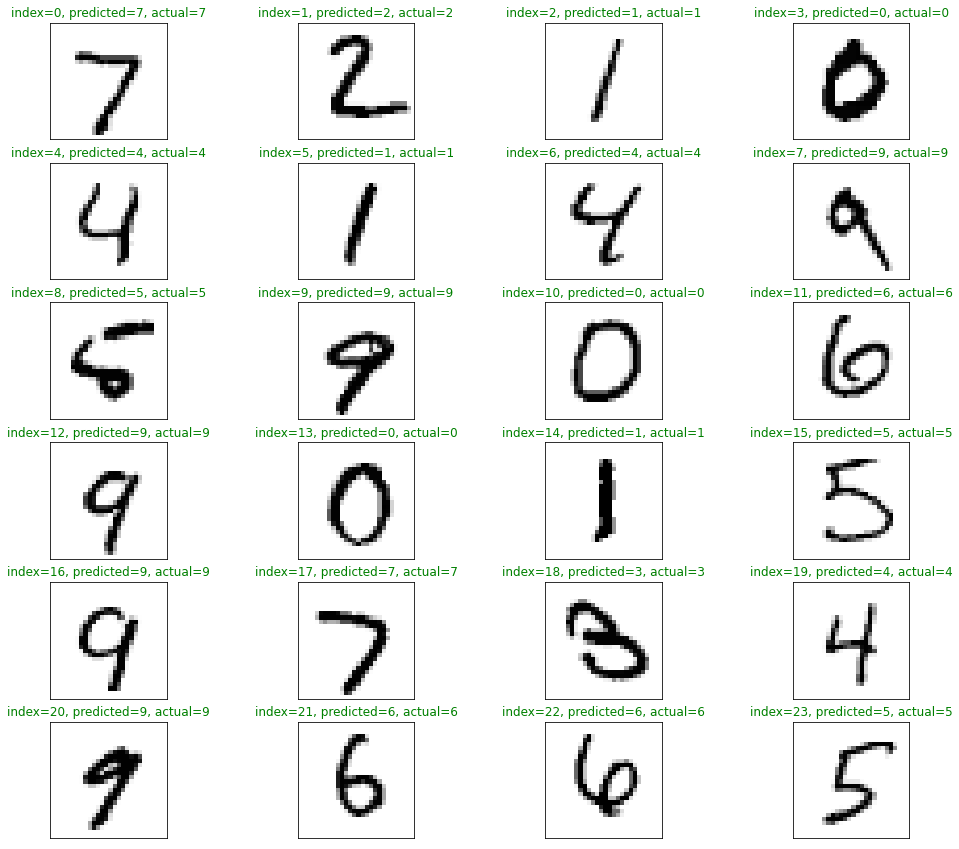

In [69]:
plt.figure(figsize = (17, 15))

start = 0

for i in range(24):
    plt.subplot(6, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    predicted = np.argmax(predictions[start+ i])
    actual = np.argmax(test_Yvector[start + i])
    col = 'g'
    if predicted != actual:
        col = 'r'
    plt.title('index={}, predicted={}, actual={}'.format(start + i, predicted, actual), color = col)
    plt.imshow(test_X[start + i], cmap='Greys')
plt.show()


It gets most of the predictions right!

Checking the Wrong prediction of index=8

In [70]:
np.argmax(predictions[8])

5

In [71]:
test_Y[8]

5

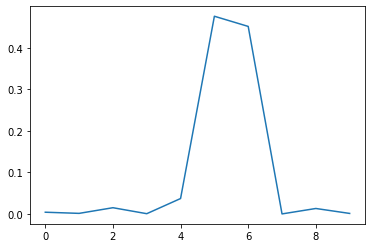

In [72]:
plt.plot(predictions[8])
#plt.plot(test_Yvector)
plt.show()

Total incorrect predictions

In [73]:
ind=0
wrong_ind=[]
for i in range(len(test_Y)):
  if (np.argmax(predictions[i])!=test_Y[i]):
    ind+=1
    wrong_ind.append(i)
print(ind)

304


There are 306 incorrect predictions of digits.Plotting graphs of predictions for all of them

In [74]:
len(wrong_ind)

304

In [77]:
for i in wrong_ind:
  pred=np.argmax(predictions[i])
  act=test_Y[i]
  print('actual_value{}  |   predicted_value{}'.format(pred,act))

actual_value7  |   predicted_value8
actual_value2  |   predicted_value4
actual_value0  |   predicted_value6
actual_value3  |   predicted_value9
actual_value4  |   predicted_value8
actual_value7  |   predicted_value2
actual_value3  |   predicted_value5
actual_value7  |   predicted_value3
actual_value0  |   predicted_value6
actual_value0  |   predicted_value8
actual_value3  |   predicted_value5
actual_value2  |   predicted_value8
actual_value6  |   predicted_value4
actual_value8  |   predicted_value1
actual_value8  |   predicted_value2
actual_value3  |   predicted_value7
actual_value4  |   predicted_value8
actual_value3  |   predicted_value5
actual_value6  |   predicted_value0
actual_value9  |   predicted_value4
actual_value2  |   predicted_value7
actual_value3  |   predicted_value8
actual_value7  |   predicted_value8
actual_value7  |   predicted_value9
actual_value3  |   predicted_value1
actual_value2  |   predicted_value7
actual_value4  |   predicted_value5
actual_value0  |   predicted